In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

california = pd.read_csv('housing.csv')

miami = pd.read_csv('miami-housing.csv')



In [ ]:


column_sels = ['longitude', 'latitude', 'housing_median_age', 'median_house_value']
new_cali = california.loc[:,column_sels]


column_sels = ['LONGITUDE', 'LATITUDE', 'age', 'SALE_PRC']
new_miami = miami.loc[:,column_sels]


new_miami.rename(columns={'LONGITUDE': 'longitude', 'LATITUDE': 'latitude', 'age': 'housing_median_age', 'SALE_PRC': 'median_house_value'}, inplace=True)




In [ ]:
new_miami

,longitude,latitude,housing_median_age,median_house_value
0,-80.160561,25.891031,67,440000.0
1,-80.153968,25.891324,63,349000.0
2,-80.153740,25.891334,61,800000.0
3,-80.152657,25.891765,63,988000.0
4,-80.154639,25.891825,42,755000.0
...,...,...,...,...
13927,-80.259795,25.783130,16,275000.0
13928,-80.260354,25.783585,26,340000.0
13929,-80.256126,25.783793,16,287500.0
13930,-80.257542,25.784007,16,315000.0


In [ ]:
df_cali_miami = pd.concat([new_miami, new_cali], ignore_index=True, sort=False)

In [ ]:
df_cali_miami

,longitude,latitude,housing_median_age,median_house_value
0,-80.160561,25.891031,67.0,440000.0
1,-80.153968,25.891324,63.0,349000.0
2,-80.153740,25.891334,61.0,800000.0
3,-80.152657,25.891765,63.0,988000.0
4,-80.154639,25.891825,42.0,755000.0
...,...,...,...,...
34567,-121.090000,39.480000,25.0,78100.0
34568,-121.210000,39.490000,18.0,77100.0
34569,-121.220000,39.430000,17.0,92300.0
34570,-121.320000,39.430000,18.0,84700.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

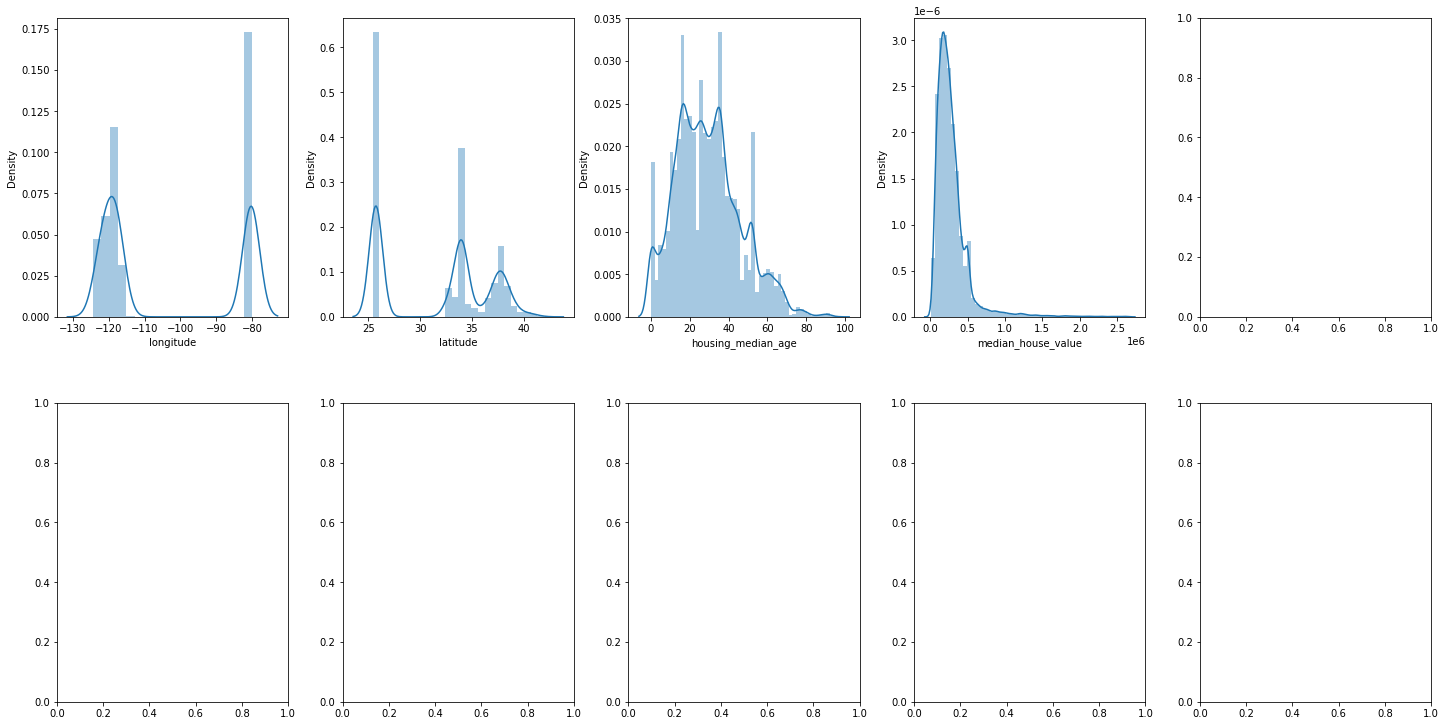

In [ ]:
#skewness dist
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_cali_miami.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

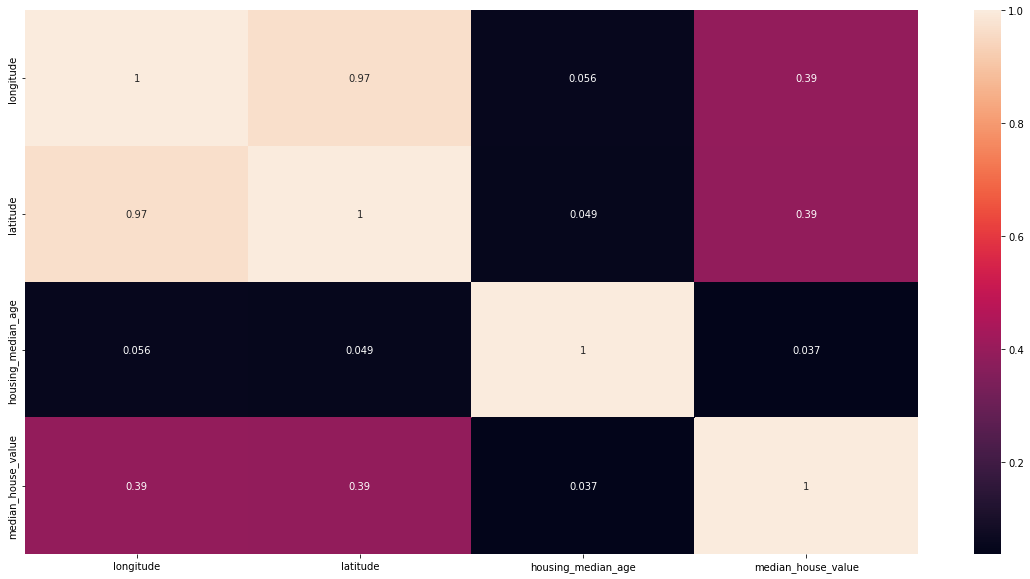

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_cali_miami.corr().abs(),  annot=True)

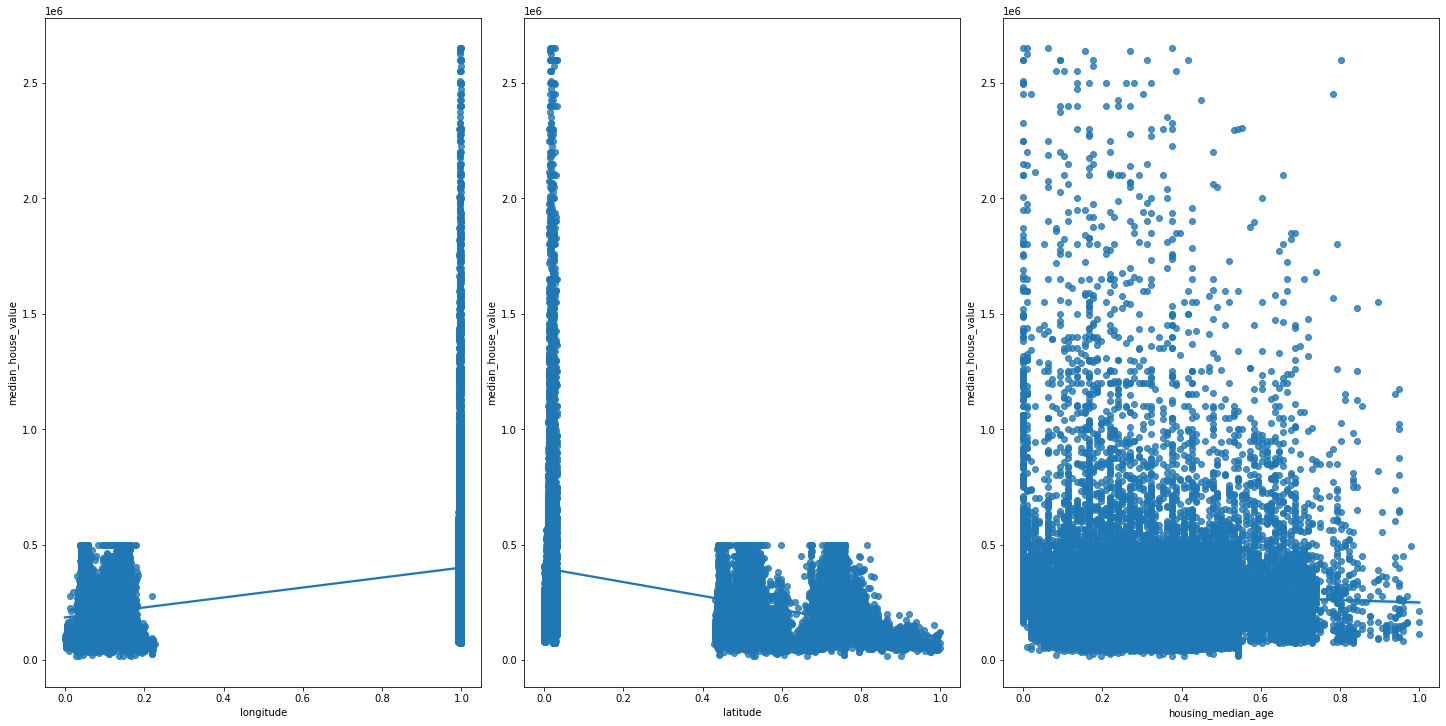

In [ ]:
# Let's scale the columns before plotting them against MEDV
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['longitude', 'latitude', 'housing_median_age']
x = df_cali_miami.loc[:,column_sels]
y = df_cali_miami['median_house_value']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)




In [ ]:
x = df_cali_miami[['longitude','latitude','housing_median_age']]
y = df_cali_miami['median_house_value']

In [ ]:
# linear regression 

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df_cali_miami[['longitude','latitude','housing_median_age']]
y = df_cali_miami['median_house_value']


SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


reg = LinearRegression().fit(X_train, y_train)

print("Score:", reg.score(X_train, y_train))

print("Coefficient:", reg.coef_)

print("Intercept:", reg.intercept_) 

y_pred = reg.predict(X_test)


print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))


Score: 0.15727572056190842
Coefficient: [ 3050.15744275 -7376.2901866   -839.53633152]
Intercept: 859649.6701995642
mean_squared_error :  42932008122.24512
mean_absolute_error :  130570.44874895971
r2_score :  0.16944542445749755
